In [18]:
import pandas as pd
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [19]:
study_results = pd.read_csv("data/Study_results.csv")
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [20]:
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [21]:
#Combined data frames (Pymac..)
total = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
total.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.aver

average = total.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = total.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = total.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = total.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = total.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
count = total.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
#Combining data frame
collection = pd.DataFrame({"average tumor volume": average,
                          "median tumor volume": median,
                          "variance tumor volume": variance,
                          "SD tumor volume": standard_deviation,
                          "SEM": SEM,
                          "count": count})
collection.head()





,average tumor volume,median tumor volume,variance tumor volume,SD tumor volume,SEM,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

new_summary_df = total.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({
    "mean", "median", "var", "std","sem","count"})
new_summary_df




,std,mean,sem,median,count,var
Drug Regimen,,,,,,
Capomulin,4.994774,40.675741,0.329346,41.557809,230,24.947764
Ceftamin,6.268188,52.591172,0.469821,51.776157,178,39.290177
Infubinol,6.567243,52.884795,0.492236,51.820584,178,43.128684
Ketapril,8.279709,55.235638,0.603860,53.698743,188,68.553577
Naftisol,8.134708,54.331565,0.596466,52.509285,186,66.173479
Placebo,7.821003,54.033581,0.581331,52.288934,181,61.168083
Propriva,6.507770,52.322552,0.512884,50.854632,161,42.351070
Ramicane,4.846308,40.216745,0.320955,40.673236,228,23.486704
Stelasyn,7.710419,54.233149,0.573111,52.431737,181,59.450562


In [35]:
new_summary_df["count"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1a225f7550>,
 <a list of 10 Text xticklabel objects>)

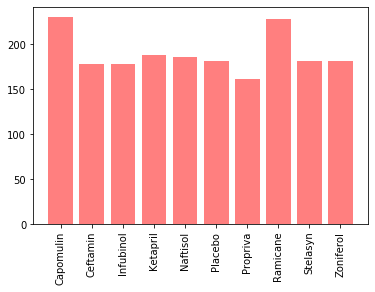

In [38]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Set x axis and tick locations
x_axis = np.arange(len(new_summary_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, new_summary_df["count"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, new_summary_df.index, rotation="vertical")
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Generate a pie 
# Generate a pie plot showing the distribution of female versus male mice using pyplot





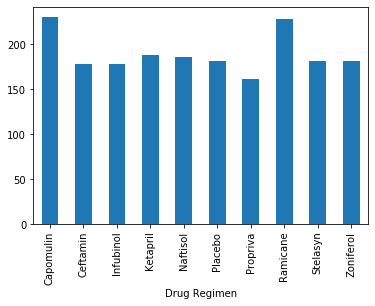

In [40]:
new_summary_df["count"].plot(kind="bar")

In [41]:
total

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [47]:
gender_df = total.groupby("Sex")["Mouse ID"].count()
print(gender_df)




Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64


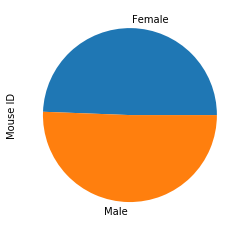

In [51]:
gender_df.plot(kind="pie")

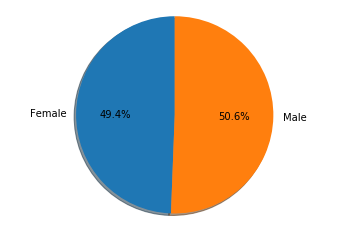

In [56]:
labels = 'Female', 'Male'
sizes = [ 935, 958]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

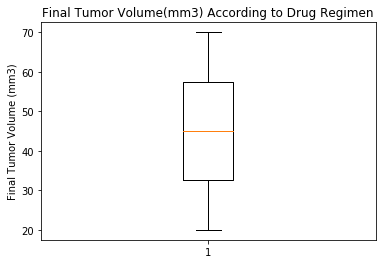

NameError: name 'Capomulin' is not defined

In [68]:
times = [20,30,40,50,60,70] 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume(mm3) According to Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(times)
plt.show()

times = [Capomulin,Ramicane,Infubinol,Ceftamin] 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume(mm3) According to Drug Regimen')
ax1.boxplot(times)
plt.show()

In [72]:
times.sort()
print(times)

[20, 30, 40, 50, 60, 70]


In [73]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

FileNotFoundError: [Errno 2] File b'"data/Study_results.csv"' does not exist: b'"data/Study_results.csv"'